# Step 1: Import Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step 2:  Import Dataset

In [2]:
data=pd.read_csv("heart.csv")

# Step 3: Dataset overview

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df=data.rename(columns={'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure', 'chol': 'cholesterol','fbs': 'fasting_blood_sugar', 
                       'restecg' : 'resting_electrocardiogram', 'thalach': 'max_heart_rate_achieved', 'exang': 'exercise_induced_angina',
                       'oldpeak': 'st_depression', 'slope': 'st_slope', 'ca':'num_major_vessels', 'thal': 'thalassemia'}, errors="raise")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        1025 non-null   int64  
 1   sex                        1025 non-null   int64  
 2   chest_pain_type            1025 non-null   int64  
 3   resting_blood_pressure     1025 non-null   int64  
 4   cholesterol                1025 non-null   int64  
 5   fasting_blood_sugar        1025 non-null   int64  
 6   resting_electrocardiogram  1025 non-null   int64  
 7   max_heart_rate_achieved    1025 non-null   int64  
 8   exercise_induced_angina    1025 non-null   int64  
 9   st_depression              1025 non-null   float64
 10  st_slope                   1025 non-null   int64  
 11  num_major_vessels          1025 non-null   int64  
 12  thalassemia                1025 non-null   int64  
 13  target                     1025 non-null   int64

In [6]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.shape


(1025, 14)

In [8]:
#checking null values

df.isnull().sum()

age                          0
sex                          0
chest_pain_type              0
resting_blood_pressure       0
cholesterol                  0
fasting_blood_sugar          0
resting_electrocardiogram    0
max_heart_rate_achieved      0
exercise_induced_angina      0
st_depression                0
st_slope                     0
num_major_vessels            0
thalassemia                  0
target                       0
dtype: int64

In [9]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [10]:
df['target'].value_counts()/df.shape[0]*100

1    51.317073
0    48.682927
Name: target, dtype: float64

In [11]:
df.corr()['target'].sort_values(ascending=False)

target                       1.000000
chest_pain_type              0.434854
max_heart_rate_achieved      0.422895
st_slope                     0.345512
resting_electrocardiogram    0.134468
fasting_blood_sugar         -0.041164
cholesterol                 -0.099966
resting_blood_pressure      -0.138772
age                         -0.229324
sex                         -0.279501
thalassemia                 -0.337838
num_major_vessels           -0.382085
exercise_induced_angina     -0.438029
st_depression               -0.438441
Name: target, dtype: float64

# Step 4: EDA

Text(0.5, 1.05, 'Target variable distribution')

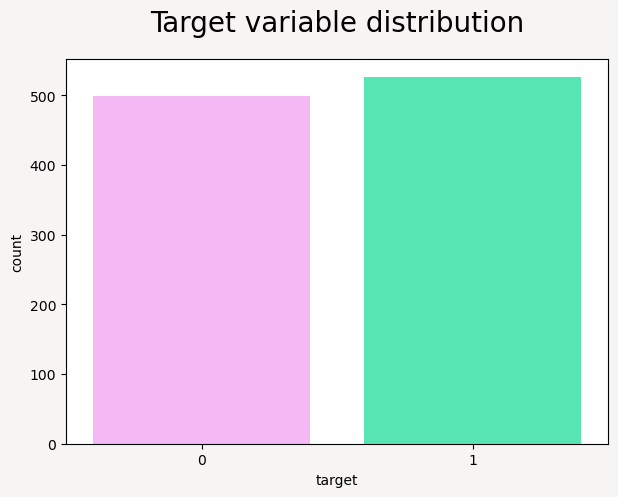

In [12]:
mypal=['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']
plt.figure(figsize=(7,5),facecolor='#F6F5F4')
ax=sns.countplot(x=df['target'],palette=mypal[1::4])

ax.set_title("Target variable distribution", fontsize=20, y=1.05)

In [13]:
corr_df=df[['chest_pain_type','max_heart_rate_achieved','st_slope','resting_electrocardiogram']]

<AxesSubplot: >

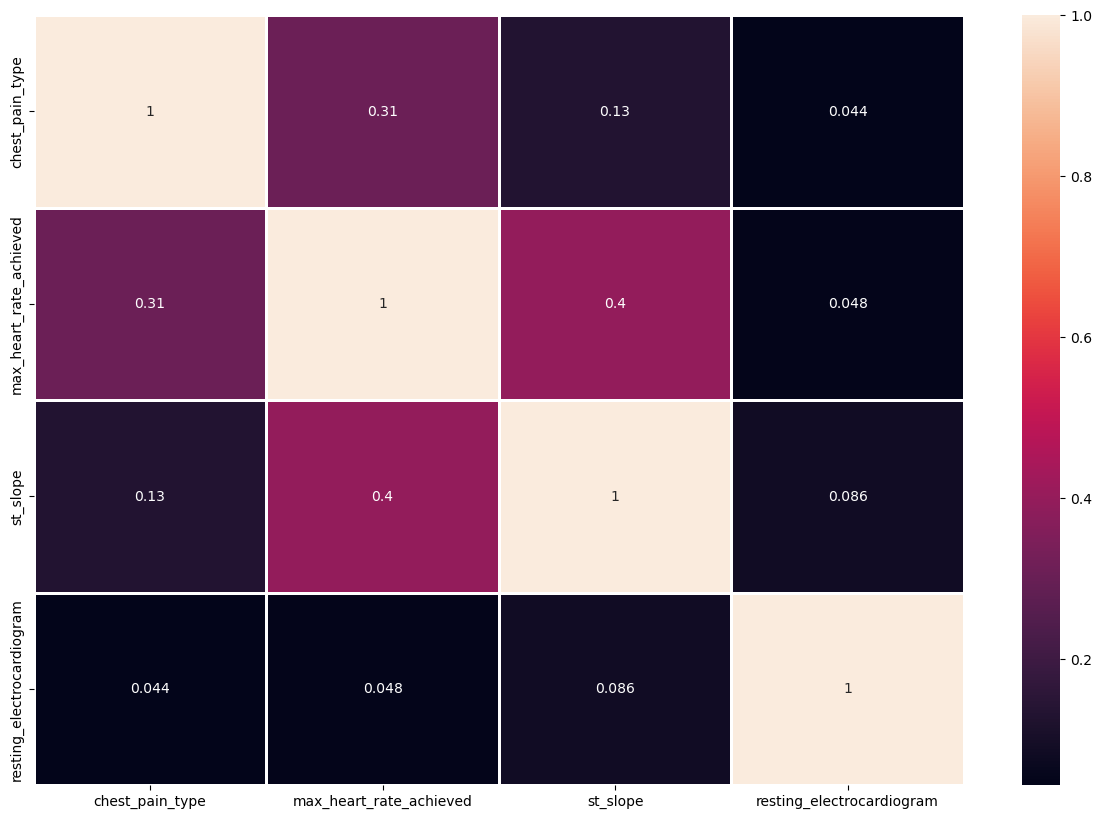

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_df.corr(),annot=True,linewidth=2)

<AxesSubplot: >

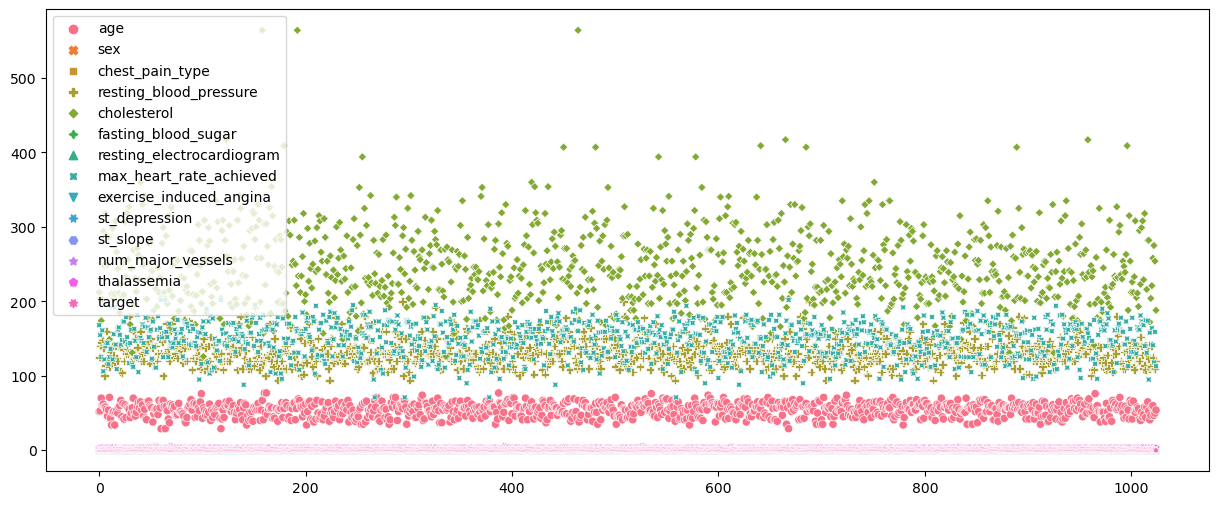

In [15]:
plt.figure(figsize = (15, 6))
sns.scatterplot(data=df)

<AxesSubplot: xlabel='max_heart_rate_achieved', ylabel='resting_blood_pressure'>

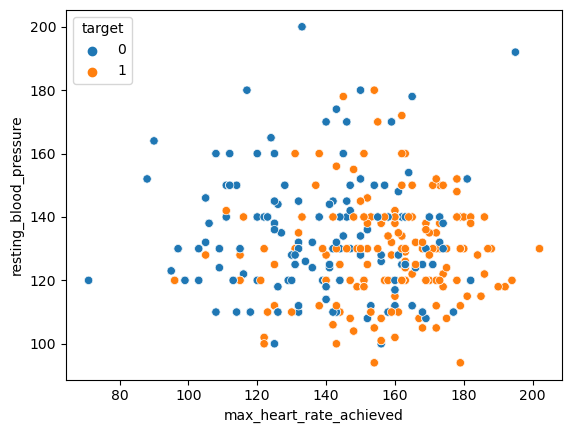

In [16]:
sns.scatterplot(data=df, x='max_heart_rate_achieved', y='resting_blood_pressure', hue='target')

In [17]:
categorical_features = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_electrocardiogram', 'exercise_induced_angina', 'st_slope', 'thalassemia']

numerical_features = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']



print('Categorical Features are : ', categorical_features)

print('Continuous Features are : ', numerical_features)




Categorical Features are :  ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_electrocardiogram', 'exercise_induced_angina', 'st_slope', 'thalassemia']
Continuous Features are :  ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']


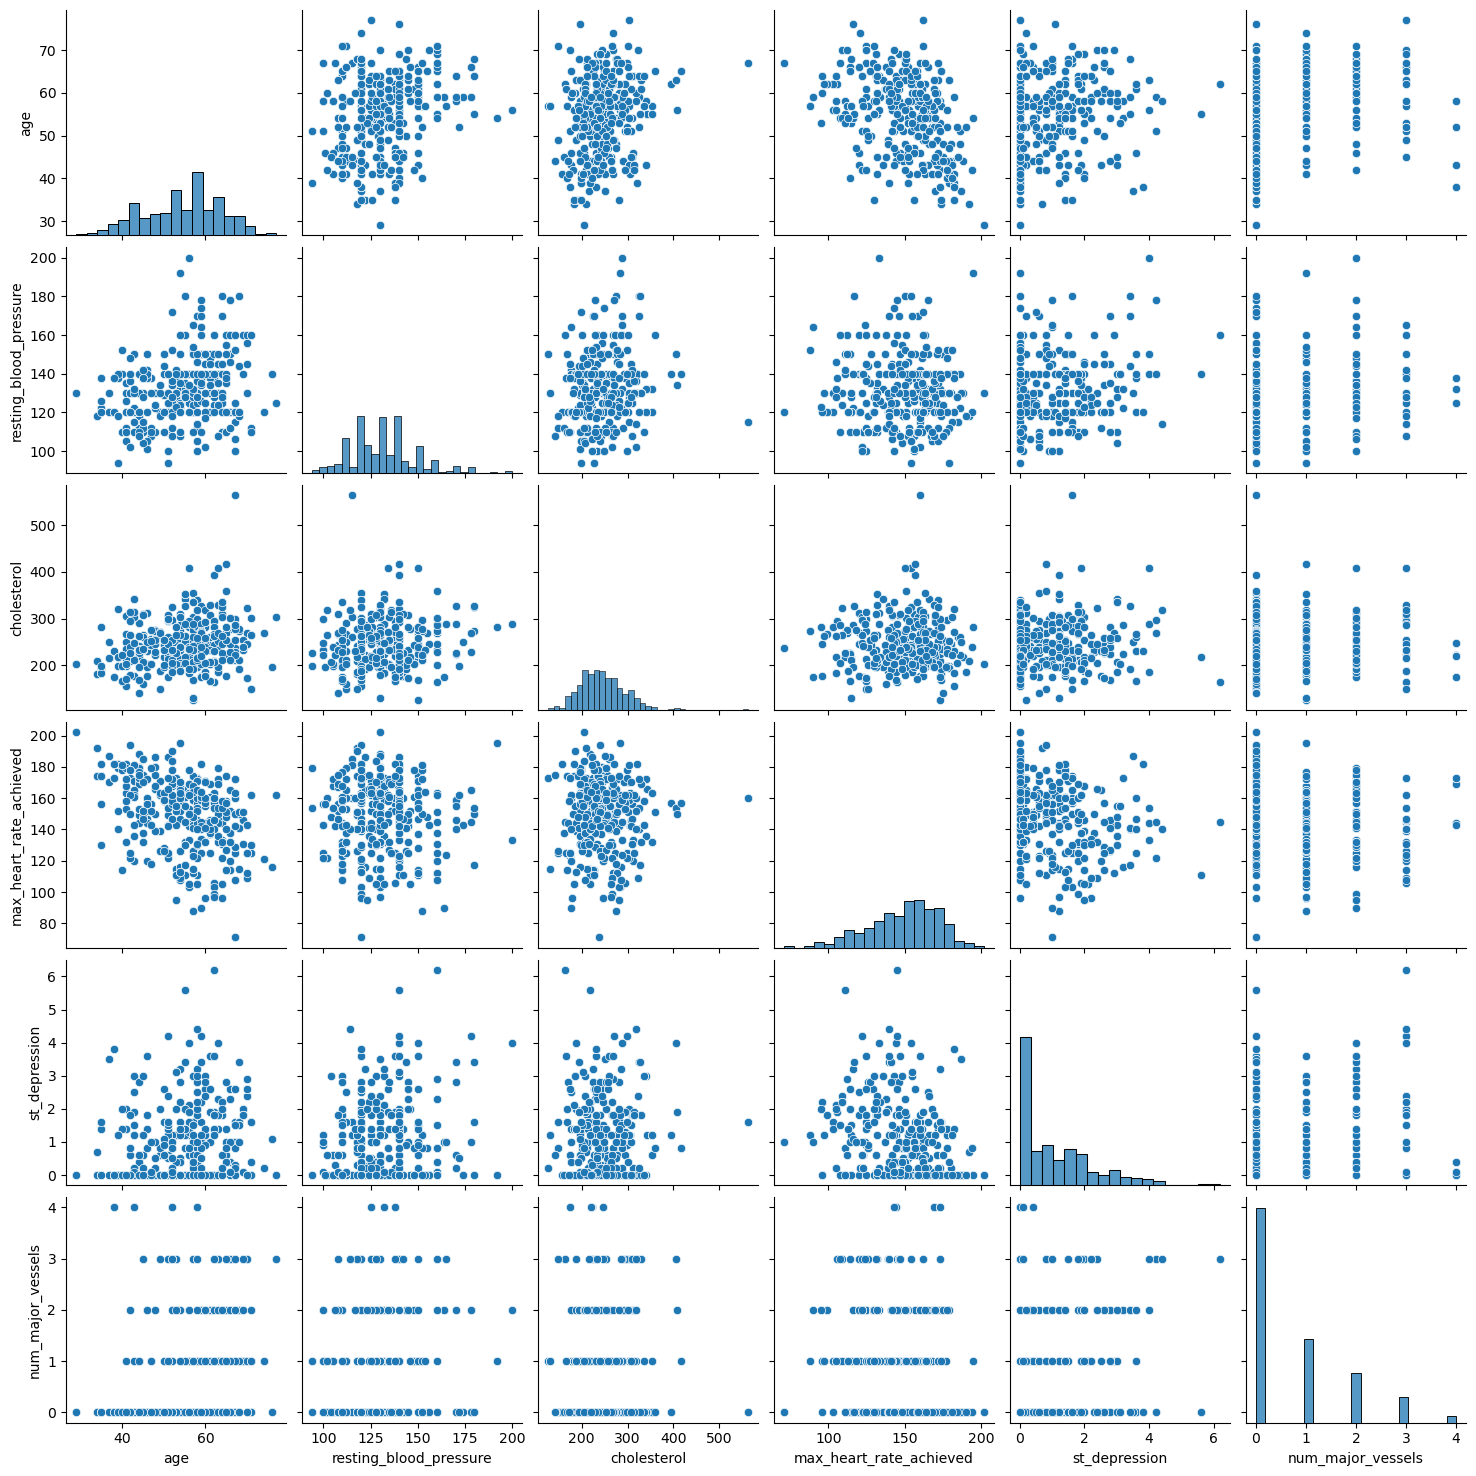

In [18]:
# Visulaizing Numerical Features

sns.pairplot(df[['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']])


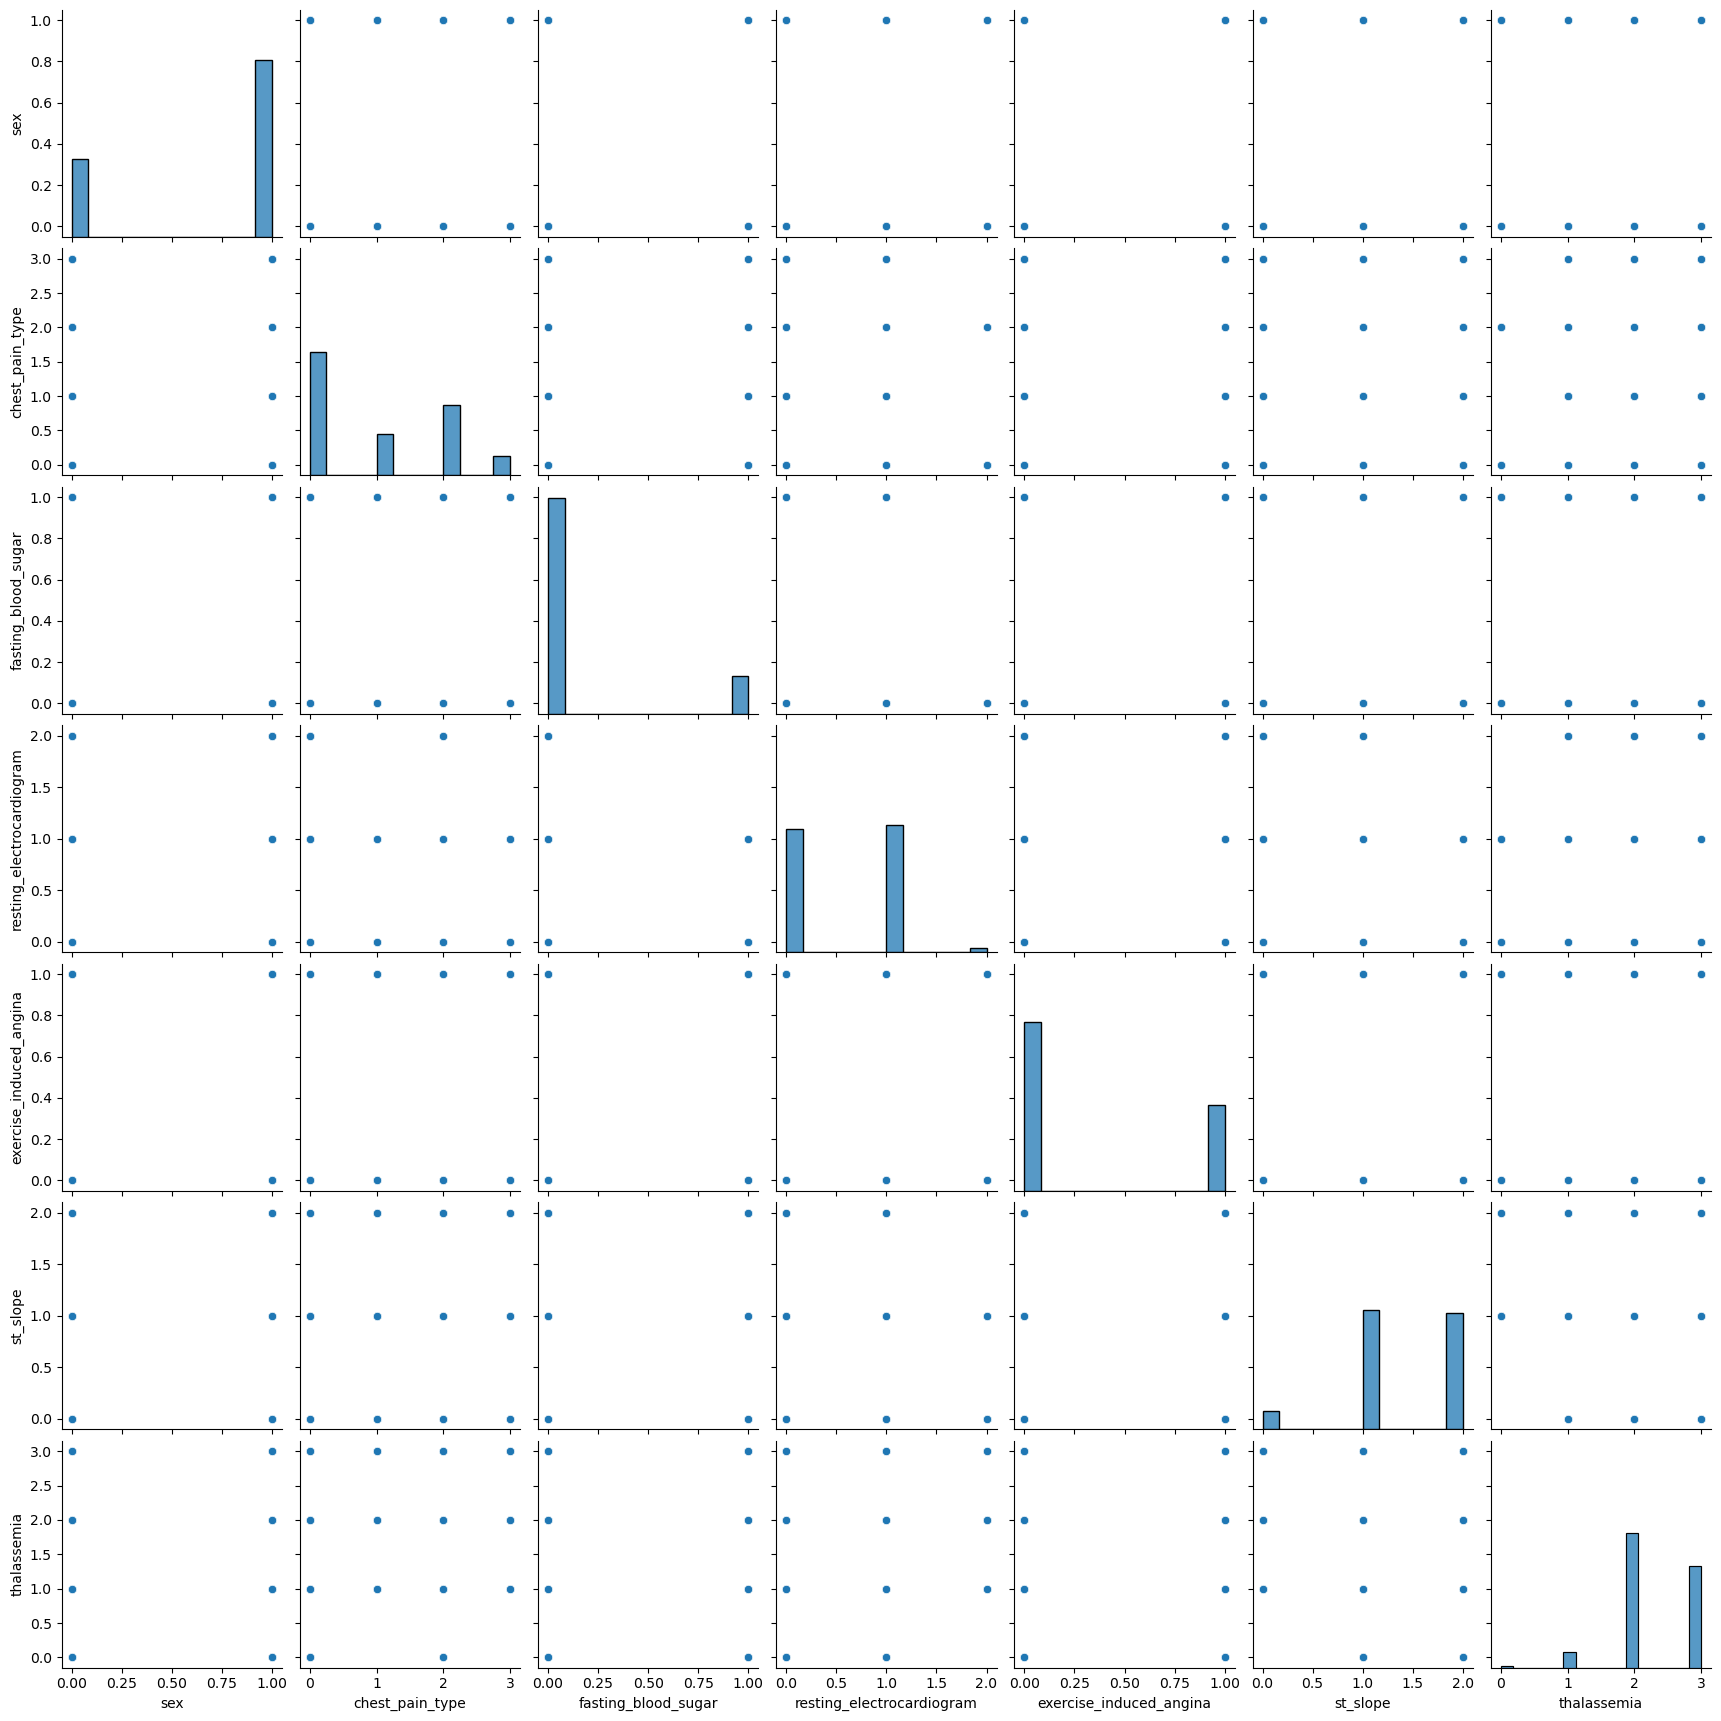

In [19]:
# Visulaizing Categorical Features

sns.pairplot(df[['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_electrocardiogram', 'exercise_induced_angina', 'st_slope', 'thalassemia']])


<AxesSubplot: >

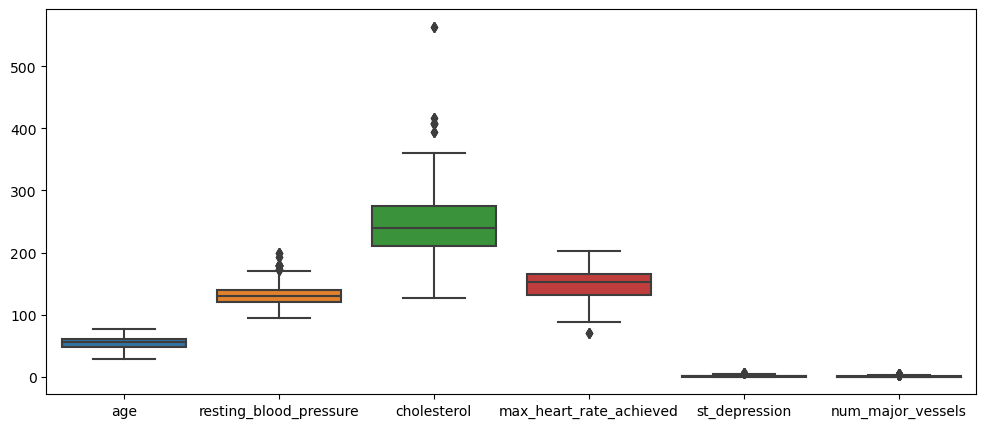

In [20]:
plt.figure(figsize = (12, 5))

sns.boxplot(df[['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']])

# Step 5: Data prepration (pre_processing)

### Removing outlier data for age

<AxesSubplot: xlabel='target', ylabel='age'>

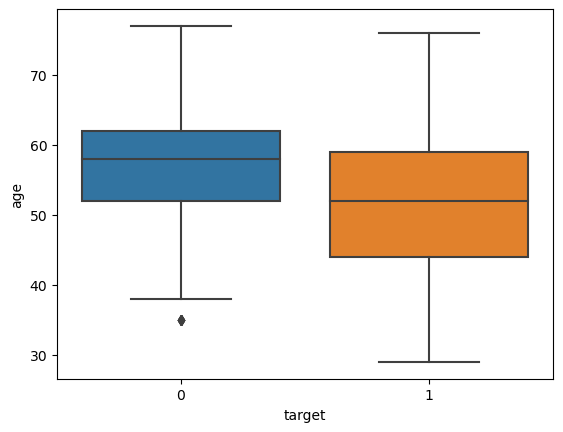

In [21]:
sns.boxplot(df, x='target', y='age')

In [22]:
df[(df['age'] == 35)  & (df['target'] == 0)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
254,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
384,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
695,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
699,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
701,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
711,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
912,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0


In [23]:
index_drop_age_0 = df[(df['age'] == 35)  & (df['target'] == 0)].index
df = df.drop(index_drop_age_0, axis = 0)

### Removing outlier data for resting_blood_pressure

<AxesSubplot: xlabel='target', ylabel='resting_blood_pressure'>

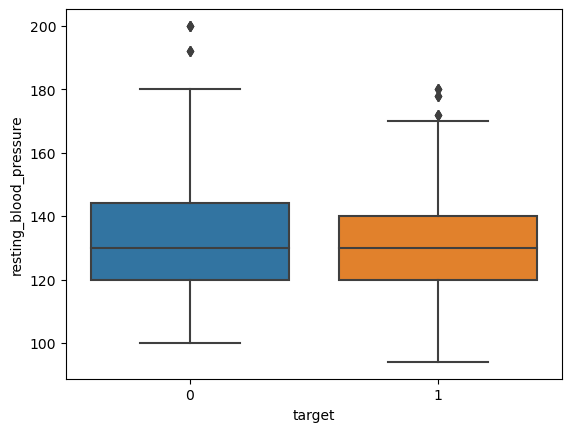

In [24]:
sns.boxplot(df, x='target', y='resting_blood_pressure')

In [25]:
df[(df['resting_blood_pressure'] >= 190) & (df['resting_blood_pressure'] <= 200) & (df['target'] == 0)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
246,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
294,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
326,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
508,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
688,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0


In [26]:
index_drop_resting_blood_pressure_0 = df[(df['resting_blood_pressure'] >= 190) & (df['resting_blood_pressure'] <= 200) & (df['target'] == 0)].index
df = df.drop(index_drop_resting_blood_pressure_0, axis = 0)

In [27]:
df[(df['resting_blood_pressure'] >= 170) & (df['resting_blood_pressure'] <= 185) & (df['target'] == 1)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
235,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
257,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
343,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
528,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
539,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
624,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
837,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
872,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1


In [28]:
index_drop_resting_blood_pressure_1 = df[(df['resting_blood_pressure'] >= 170) & (df['resting_blood_pressure'] <= 185) & (df['target'] == 1)].index
df = df.drop(index_drop_resting_blood_pressure_1, axis = 0)

## Removing outlier data for cholesterol

<AxesSubplot: xlabel='target', ylabel='cholesterol'>

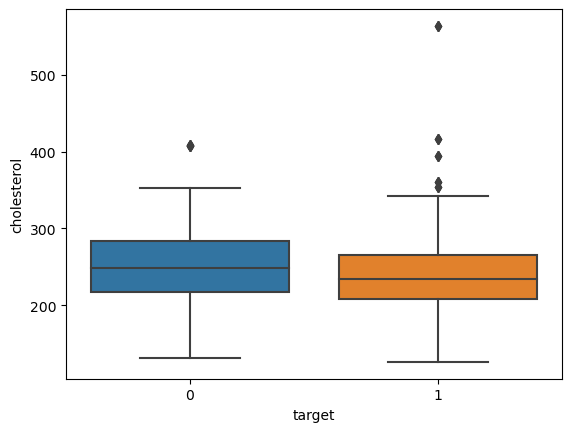

In [29]:
sns.boxplot(df, x='target', y='cholesterol')

In [30]:
df[(df['cholesterol'] >= 400) & (df['cholesterol'] <= 410) & (df['target'] == 0)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
481,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
641,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
685,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
889,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
996,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [31]:
index_drop_cholesterol_0 = df[(df['cholesterol'] >= 400) & (df['cholesterol'] <= 410) & (df['target'] == 0)].index
df = df.drop(index_drop_cholesterol_0, axis = 0)

In [32]:
df[(df['cholesterol'] >= 350) & (df['cholesterol'] <= 450) & (df['target'] == 1)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
40,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
167,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
419,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
422,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
435,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
542,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
578,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
665,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1


In [33]:
index_drop_cholesterol_1 = df[(df['cholesterol'] >= 350) & (df['cholesterol'] <= 450) & (df['target'] == 1)].index
df = df.drop(index_drop_cholesterol_1, axis = 0)

In [34]:
df[(df['cholesterol'] < 600) & (df['target'] == 1)].tail(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
1003,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
1004,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
1006,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
1007,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
1008,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [35]:
index_drop_cholesterol_1 = df[(df['cholesterol'] < 600) & (df['target'] == 1)].tail(10).index
df = df.drop(index_drop_cholesterol_1, axis = 0)

### Removing outlier data for resting_blood_pressure

<AxesSubplot: xlabel='target', ylabel='max_heart_rate_achieved'>

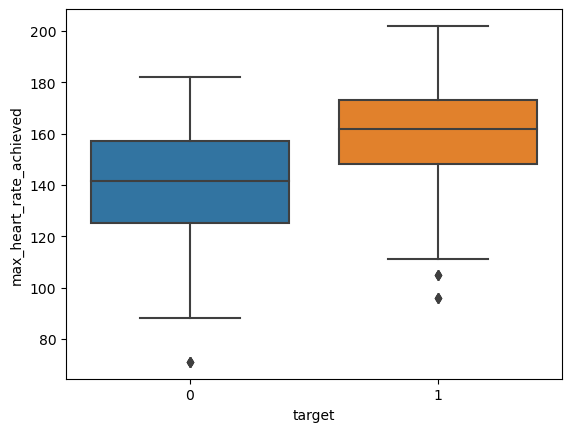

In [36]:
sns.boxplot(df, x='target', y='max_heart_rate_achieved')

In [37]:
df[(df['max_heart_rate_achieved'] < 80) & (df['target'] == 0)].head(40)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
296,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
378,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
559,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [38]:
index_drop_max_heart_rate_achieved_0 = df[(df['max_heart_rate_achieved'] < 80) & (df['target'] == 0)].head(40).index
df = df.drop(index_drop_max_heart_rate_achieved_0, axis = 0)

In [39]:
df[(df['max_heart_rate_achieved'] >= 90) & (df['max_heart_rate_achieved'] <= 100) & (df['target'] == 1)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
708,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
793,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
967,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1


In [40]:
index_drop_max_heart_rate_achieved_1 = df[(df['max_heart_rate_achieved'] >= 90) & (df['max_heart_rate_achieved'] <= 100) & (df['target'] == 1)].index
df = df.drop(index_drop_max_heart_rate_achieved_1, axis = 0)

In [41]:
df[(df['max_heart_rate_achieved'] >= 100) & (df['max_heart_rate_achieved'] <= 110) & (df['target'] == 1)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
38,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
642,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
983,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1


In [42]:
index_drop_max_heart_rate_achieved_1 = df[(df['max_heart_rate_achieved'] >= 100) & (df['max_heart_rate_achieved'] <= 110) & (df['target'] == 1)].index
df = df.drop(index_drop_max_heart_rate_achieved_1, axis = 0)

### Removing outlier data for st_depression

<AxesSubplot: xlabel='target', ylabel='st_depression'>

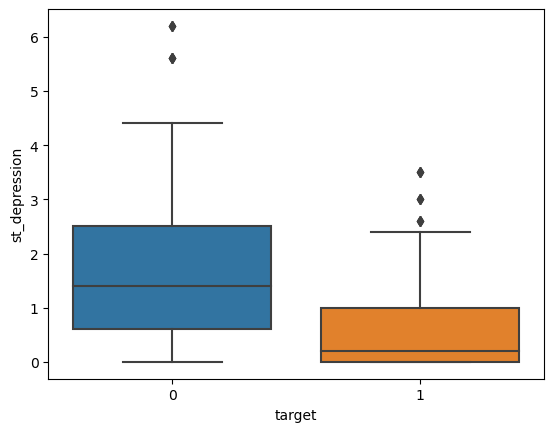

In [43]:
sns.boxplot(df, x='target', y='st_depression')

In [44]:
df[(df['st_depression'] >= 5.5) & (df['st_depression'] <= 6.5) & (df['target'] == 0)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
54,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
393,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
526,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
613,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
833,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [45]:
index_drop_st_depression_0 =df[(df['st_depression'] >= 5.5) & (df['st_depression'] <= 6.5) & (df['target'] == 0)].index
df = df.drop(index_drop_st_depression_0, axis = 0)

In [46]:
df[(df['st_depression'] >= 2.5) & (df['st_depression'] < 4) & (df['target'] == 1)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
22,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
265,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
332,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
433,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
652,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
664,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
713,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
851,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
913,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1


In [47]:
index_drop_st_depression_1 =df[(df['st_depression'] >= 2.5) & (df['st_depression'] < 4) & (df['target'] == 1)].index
df = df.drop(index_drop_st_depression_1, axis = 0)

### Removing outlier data for num_major_vessels

<AxesSubplot: xlabel='target', ylabel='num_major_vessels'>

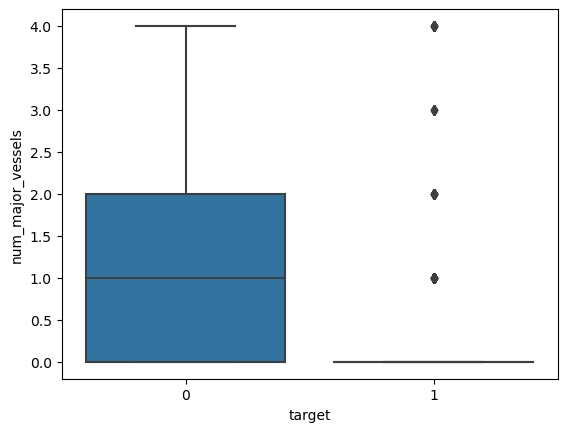

In [48]:
sns.boxplot(df, x='target', y='num_major_vessels')

In [49]:
num_vessels_list=[1,2,3,4,5]

df[(df['target'] == 1) & df['num_major_vessels'].isin(num_vessels_list)]


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
21,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
36,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
48,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
970,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
982,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
985,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1


In [50]:
index_drop_num_major_vessels_1 =df[(df['target'] == 1) & df['num_major_vessels'].isin(num_vessels_list)].index
df = df.drop(index_drop_num_major_vessels_1, axis = 0)

# Step 6: Scaling the Features

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler= StandardScaler()

In [53]:
#scale selected data

df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [54]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,-0.235473,1,0,-0.346773,-0.653636,0,1,0.828245,0,-0.070863,2,1.427859,3,0
1,-0.121796,1,0,0.591054,-0.839197,1,0,0.263673,1,1.849288,0,-0.676354,3,0
2,1.810704,1,0,0.903663,-1.437116,0,1,-1.039183,1,1.392109,0,-0.676354,3,0
3,0.787616,1,0,1.091228,-0.839197,0,1,0.524245,0,-0.985220,2,0.375752,3,0
4,0.901292,0,0,0.466011,1.037031,1,1,-1.864326,0,0.752059,1,2.479965,2,0


# Step 6: Determine the features & target label

In [55]:
X=df.drop('target',axis=1)
y=df['target']

# Step 8:Split the Dataset to Train & Test

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Step 9:Train the Model using the X_train and y_train

In [57]:
from sklearn.svm import SVC

In [58]:
svm_model= SVC()

In [59]:
svm_model.fit(X_train, y_train)

SVC()

# Step 10: Predicting Test Data

In [60]:
y_pred= svm_model.predict(X_test)

In [61]:
#The prediction Value VS Actual Value of Test Data
pd.DataFrame({'Y_Test':y_test, 'Y_Pred': y_pred}).head(10)

,Y_Test,Y_Pred
940,0,0
740,1,1
355,1,1
443,1,1
66,1,1
525,1,1
530,0,0
875,0,0
727,1,1
503,1,1


# Step 11: Evaluating the Model

In [62]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import metrics

In [63]:
accuracy_score(y_test, y_pred)

0.8809523809523809

In [64]:
confusion_matrix(y_test, y_pred)

array([[114,  20],
       [ 10, 108]], dtype=int64)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       134
           1       0.84      0.92      0.88       118

    accuracy                           0.88       252
   macro avg       0.88      0.88      0.88       252
weighted avg       0.88      0.88      0.88       252



## Hyperparameters

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid, cv=5)

In [68]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [69]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

In [70]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [71]:
y_pred_grid= grid.predict(X_test)

In [73]:
accuracy_score(y_test, y_pred_grid)

0.9682539682539683

In [72]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       134
           1       0.97      0.96      0.97       118

    accuracy                           0.97       252
   macro avg       0.97      0.97      0.97       252
weighted avg       0.97      0.97      0.97       252

